# Understanding the MelSpectrogram

There are a five controll parameters that controll how the spectrogram is generated. In this notebook we created an interactive interface that allows you to play with the values and explore how they effect the spectrogram.

Currently the code visualizes a dog barking sound from the cars-and-dogs data set.  To change the file change the variable `MainFile` to point towards the audio file you want to use.(Tab completion works mostly for folders)

In [3]:
from __future__ import print_function

%matplotlib inline
import cv2
import csv
import numpy as np
import librosa
import wave
import os
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

from PIL import Image
import IPython.display as displayImg

import pickle

In [4]:
##SpectrographVariables
SpectrumVariables={}
SpectrumVariables["RESOLUTION"] =0
SpectrumVariables["SAMPLE_RATE"]=0
SpectrumVariables["N_FFT"]=0
SpectrumVariables["HOP_LENGTH"]=0
SpectrumVariables["FMIN"]=0
SpectrumVariables["FMAX"]=0
SpectrumVariables["N_MELS"]=0
SpectrumVariables["POWER"]=0

interactive(children=(IntSlider(value=32000, description='SAMPLE_RATE', max=48000, min=16000, step=100), IntSl…

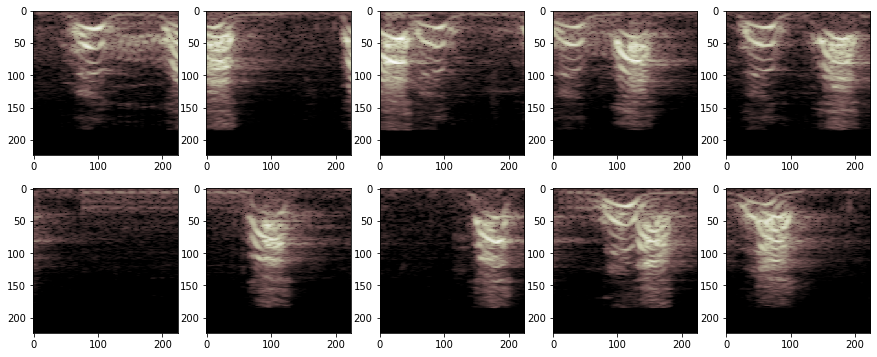

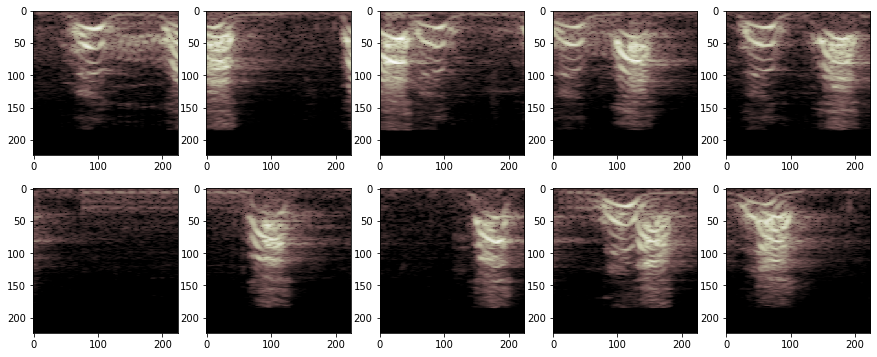

In [6]:
### Image output resolution
RESOLUTION = 224
MainFile="../AudioData/Cats-Vs-Dogs/Dogs/365089__justiiiiin__dogs-barking.wav"
#MainFile="../AudioData/audio-cats-and-dogs/cats_dogs/train/cat/cat_23.wav"


def f(SAMPLE_RATE, N_FFT,HOP_LENGTH,FMIN, FMAX,N_MELS,POWER):
    
    SpectrumVariables["RESOLUTION"] =RESOLUTION
    SpectrumVariables["SAMPLE_RATE"]=SAMPLE_RATE
    SpectrumVariables["N_FFT"]=N_FFT
    SpectrumVariables["HOP_LENGTH"]=HOP_LENGTH
    SpectrumVariables["FMIN"]=FMIN
    SpectrumVariables["FMAX"]=FMAX
    SpectrumVariables["N_MELS"]=N_MELS
    SpectrumVariables["POWER"]=POWER
   
    x ,sample_rate_in = librosa.load(MainFile,mono=True)
    audio_data = librosa.resample(x, sample_rate_in, SAMPLE_RATE)
    mel_spec_power = librosa.feature.melspectrogram(audio_data, sr=SAMPLE_RATE, n_fft=N_FFT, 
                                                    hop_length=HOP_LENGTH, 
                                                    n_mels=N_MELS, power=POWER,
                                                   fmin=FMIN,fmax=FMAX)
    mel_spec_db = np.float32(librosa.power_to_db(mel_spec_power, ref=np.max))
    image = mel_spec_db; # convert to float
    image -= image.min() # ensure the minimal value is 0.0
    image /= image.max() # maximum value in image is now 1.0
    image*=256;
    img = image.astype(np.uint8)
    print(img.min(),img.max())
    colerPic = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
    fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()    
    for i in range(int(np.floor(colerPic.shape[1]/RESOLUTION))):
        startx=RESOLUTION*i
        stopx=RESOLUTION*(i+1)
        OutputImage = cv2.resize(colerPic[:,startx:stopx,:],(RESOLUTION,RESOLUTION))
        axs[i].imshow(OutputImage)

interactive_plot = interactive(f, {"manual":True},SAMPLE_RATE=(16000, 48000,100), N_FFT=(128, 2048*2, 64),HOP_LENGTH=(128, 512, 16),FMIN=(0,300,5),FMAX=(300,40000,10),N_MELS=(10,300,10),POWER=(0.1,3))
interactive_plot

## Saving new settings

Normally you can copy and paste the new values by hand. For this particular workshop we create a dictionary call ``SpectographVariables`` that contains all relevant information. You can load in this dictionary when you generate the spectrums or when you run the inference from your microphone. Run the box bellow to save the variables to a file. Rememeber, the file name as you will need it for the generating the spectrograms for all audio files. 

### Caution!  files will be overwritten without beeing asked.

In [9]:
FileName =input("Type in your filename here => ")
print("It will end up in the same folder as this notebook.")
pickle.dump(SpectrumVariables, open( FileName+'.SpecVar', "wb" ))
print("File created as: "+FileName+".SpecVar")

Type in your filename here => Standard
It will end up in the same folder as this notebook.
File created as: Standard.SpecVar
